In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Polym_Class_Module as Polym_Class

In [3]:
IDTBT_polymer = Polym_Class.polymer('IDTBT_v1_2.log')
polym_2 = IDTBT_polymer.Outpout_to_DataFrame_coverted_shifted(51, 0, 1)
polym_2.head()

,K_points,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
0,51.0,-388.007,-388.006,-387.979,-387.979,-277.077,-277.076,-277.011,-277.01,-276.611,...,21.722,21.778,21.953,22.016,22.210,22.214,22.531,22.557,22.643,22.796
1,50.0,-388.007,-388.006,-387.979,-387.979,-277.077,-277.076,-277.011,-277.01,-276.611,...,21.722,21.778,21.953,22.016,22.209,22.216,22.531,22.558,22.643,22.797
2,49.0,-388.007,-388.006,-387.979,-387.979,-277.077,-277.076,-277.011,-277.01,-276.611,...,21.722,21.778,21.953,22.016,22.207,22.217,22.529,22.560,22.643,22.798
3,48.0,-388.007,-388.006,-387.979,-387.979,-277.077,-277.076,-277.011,-277.01,-276.611,...,21.722,21.778,21.953,22.016,22.205,22.219,22.528,22.562,22.643,22.799
4,47.0,-388.007,-388.006,-387.979,-387.979,-277.077,-277.076,-277.011,-277.01,-276.611,...,21.722,21.778,21.953,22.016,22.203,22.221,22.526,22.564,22.644,22.800


In [4]:
band_dict = {'DPPBTz' : [131,132,133,134], 'IDTBT':[229,230,231,232], 'P3HT':[47,48,49,50], 'PBTTT':[80,81,82,83]}


In [5]:
Polym_Class.DataFrame_for_coupling_J( [polym_2, 'cos', 229, 230])

-6.738


,Polym_name,J [eV],eps_A [eV],eps_D [eV]
0,IDTBT VB,0.275205,-6.738,-6.687


-6.738
-6.738
-6.738
-1.155
-1.155
-1.155


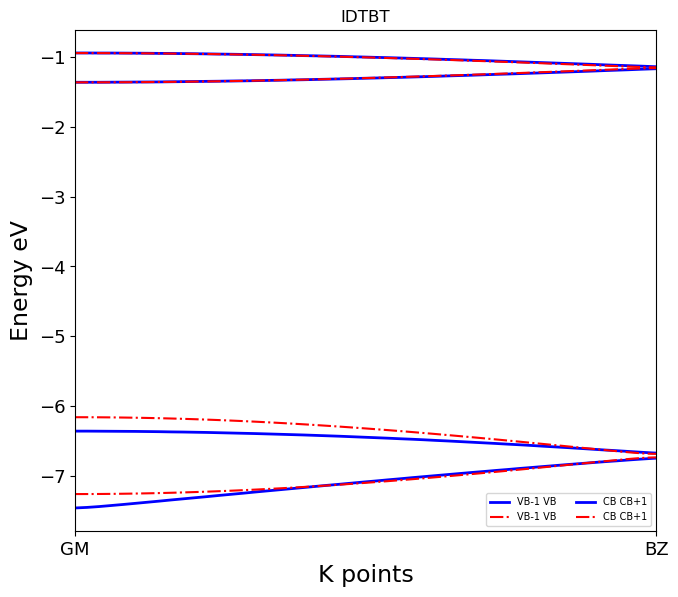

In [6]:
title = 'IDTBT'
trig_func = 'cos'
VB_band = 230
CB_band = 231
Polym_Class.plotting_to_MODIFY(title, polym_2, trig_func, VB_band, CB_band)

# PART 3 CALCULATION OF COEFFICIENTS CA AND CB

In [7]:
# 6-31G**
# BASIS SET
C = 15
N = 15
H = 5
S = 19
O = 15

# SUM OF BASIS SET
full_basis_set = 22*C + 12*H + 2*N + 2*O + 4*S

basis_set_fragment1 = 10*H + 16*C + 2*N + 2*O + 2*S # FIRST
basis_set_fragment2 = 2*H + 6*C + 2*S # SECOND


## Function to take the Column I (or Molecular Orbital e.g. HOMO) of Interest

### It takes as input:

1. `file_name` ( Hence the KP point to which you want to see the MO coefficients) ADD the *.file*
2. `num_MO` The Number of the Molecular Orbital you are interested
3. `full_basis_set` The number of Basis set in the Basis set you chose (Look above in the Basis Set check above it is the full_basis_set varible)
4. `basis_set_fragment1` The Number of Basis function for the Fragment1 (IF more than 1 Fragment present modify code)

In [8]:
file_name = 'IDTBT_v1_MO_kp0.dat'
num_MO = 229 # HOMO-1
full_basis_set = 1134
basis_set_fragment1 = 32*H + 40*C + 0*N + 0*O + 4*S # FIRST

Polym_Class.MO_coefficient_calculator(file_name, num_MO, full_basis_set,  basis_set_fragment1)

 The coefficient for the Fragment1 is: 0.9501900900858804
 The coefficient for the Fragment2 is: 0.04980990087160814
 We can check that the summation bring to 1: 1.0


(0.95, 0.05)

In [8]:
file_name = 'IDTBT_v1_MO_kp0.dat'
num_MO = 229 # HOMO-1
full_basis_set = 1134
basis_set_fragment1 = 32*H + 40*C + 0*N + 0*O + 4*S # FIRST

coeff_1_list = []
coeff_2_list = []

for num_MO in band_dict['IDTBT']:
    c1, c2 = Polym_Class.MO_coefficient_calculator(file_name, num_MO, full_basis_set,  basis_set_fragment1)
    coeff_1_list.append(c1)
    coeff_2_list.append(c2)

df_coefficient = pd.DataFrame({'MO':['HOMO-1', 'HOMO', 'LUMO', 'LUMO+1'], 'MO num': band_dict['IDTBT'], 
             'Coeff Frag1': coeff_1_list, 'Coeff Frag2': coeff_2_list })
df_coefficient

 The coefficient for the Fragment1 is: 0.9501900900858804
 The coefficient for the Fragment2 is: 0.04980990087160814
 We can check that the summation bring to 1: 1.0
 The coefficient for the Fragment1 is: 0.9262350015030214
 The coefficient for the Fragment2 is: 0.07376457438641719
 We can check that the summation bring to 1: 1.0
 The coefficient for the Fragment1 is: 0.8361394660147494
 The coefficient for the Fragment2 is: 0.1638604354192969
 We can check that the summation bring to 1: 1.0
 The coefficient for the Fragment1 is: 0.7111524594891036
 The coefficient for the Fragment2 is: 0.28884732257894397
 We can check that the summation bring to 1: 1.0


,MO,MO num,Coeff Frag1,Coeff Frag2
0,HOMO-1,229,0.95,0.05
1,HOMO,230,0.93,0.07
2,LUMO,231,0.84,0.16
3,LUMO+1,232,0.71,0.29
